#  Practice 3 : Analysis of trade scores
 
Authors:
- Martín Hijar Jiménez
- Eduardo Salgado Díaz del Río

8 January 2022

Subject: Machine Learning - Master's Degree in Data Science 

### Project goal

The aim of the project is to find out what could be the different locations to set up a company, especially in the franchise market and what could be the star ratings that could be given by different reviews found in different websites.

### Phases of the project

- It is a dataset to train and validate prediction models using Machine learning, although in the first phase of the project, we will perform a general analysis of the dataset.

- In the second phase, we will make an analysis of different franchises selected previously, we will also perform different graphs and an analysis of the reviews that have been posted by the customers in the different franchises such as the most common words, and the most used positive and negative words in the reviews.

- In this last phase, we will make predictions using a neural network to predict the stars and we will also apply the shap library to perform the explainability.

### Dataset

The data belongs to the Yelp_dataset, it is subdivided in five subsets of data, each table refers to a different thing having in common certain tables that allow them to be joined together. Among them there are numerical and categorical, in this work we will use stars as target variable.



Libraries

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec 


Bad key text.latex.preview in file /Users/eduardo/opt/anaconda3/envs/practica0/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/eduardo/opt/anaconda3/envs/practica0/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/eduardo/opt/anaconda3/envs/practica0/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jp

Read Data

We load each *.json* file into a dataframe and put them all together in a dataframe dictionary.

In [ ]:
# path_files = ['../data/raw/yelp_academic_dataset_business.json', '../data/raw/yelp_academic_dataset_checkin.json', '../data/raw/yelp_academic_dataset_review.json',
#                 '../data/raw/yelp_academic_dataset_tip.json', '../data/raw/yelp_academic_dataset_user.json']

# data_dict = {}

# for data_path in path_files:
    
#     data_file = open(data_path, encoding='utf-8')

#     data = []
#     for line in data_file:
#         data.append(json.loads(line))

#     json_name = data_path.split('/')[-1].split('.')[0].split('_')[-1] #Llamar a cada dataframe: 'business', 'checkin', 'review'...

#     data_dict[json_name] = pd.DataFrame(data)
#     data_file.close()

# data_dict['business'].to_parquet('../data/raw/business.parquet')
# data_dict['checkin'].to_parquet('../data/raw/checkin.parquet')
# data_dict['review'].to_parquet('../data/raw/review.parquet')
# data_dict['tip'].to_parquet('../data/raw/tip.parquet')
# data_dict['user'].to_parquet('../data/raw/user.parquet')

In [3]:
df_business = pd.read_parquet('../data/raw/business.parquet')
df_checkin = pd.read_parquet('../data/raw/checkin.parquet')
df_review = pd.read_parquet('../data/raw/review.parquet')
df_tip = pd.read_parquet('../data/raw/tip.parquet')
df_user = pd.read_parquet('../data/raw/user.parquet')

Preview of each dataframe

Analysis of Business Dataset

In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


We see that there are columns with null data in the attributes, categories and hours columns. We count how many there are in each of these variables.

In [6]:
pd.isnull(df_business[[x for x in df_business.columns[pd.isna(df_business).any()].tolist()]]).sum()

attributes    13744
categories      103
hours         23223
dtype: int64

In [8]:
# Replace null with Unknown
df_business = df_business.replace({np.nan: "Unknown"})

# We do another check to see if there are any nulls.
pd.isnull(df_business[[x for x in df_business.columns[pd.isna(df_business).any()].tolist()]]).sum()

Series([], dtype: float64)

Star Rating Distribution

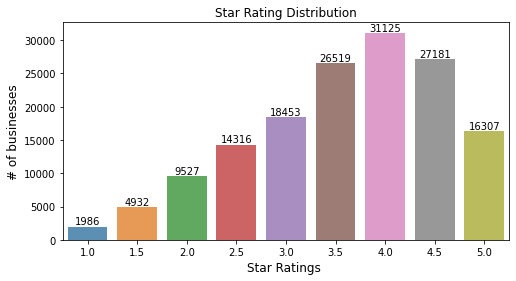

In [6]:
#Get the distribution of the ratings
x=df_business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

This code creates a bar chart showing the distribution of star ratings for a set of businesses. The graph is created  from the stars column of that dataframe.

First, the number of times each star rating appears in the stars column is counted and the result is stored in the x variable. Then, the values of x are sorted in ascending order according to their indices (which are the star ratings).

Finally, labels with the number of businesses are added to each bar using a for loop. First, the bars of the chart are obtained as a list of Rectangle objects in the variable rects. Then, the values of x.values (which are the number of businesses for each star rating) are assigned to the labels variable. Finally, a for loop is used to go through both lists and add a label with the number of businesses to each bar. 

Top Categories

There are  54465  different types/categories of Businesses in Yelp!


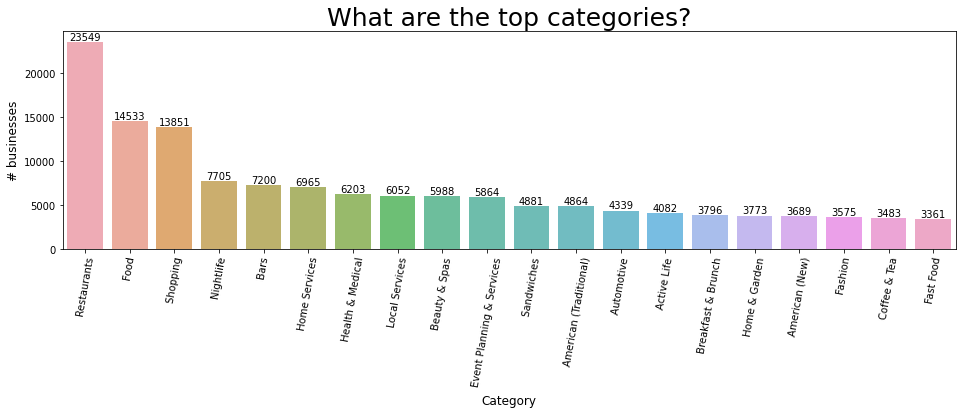

In [7]:
# What are the popular business categories?
business_cats=' '.join(filter(lambda x: x if x is not None else '', df_business['categories']))

cats=pd.DataFrame(business_cats.split(','),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

World wide view

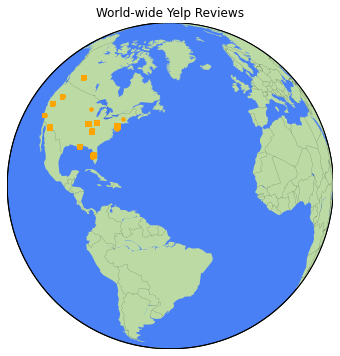

In [8]:
#basic basemap of the world
plt.figure(1, figsize=(15,6))
# use ortho projection for the globe type version
m1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

# hex codes from google maps color pallete = http://www.color-hex.com/color-palette/9261
#add continents
m1.fillcontinents(color='#bbdaa4',lake_color='#4a80f5') 
# add the oceans
m1.drawmapboundary(fill_color='#4a80f5')                
# Draw the boundaries of the countires
m1.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
mxy = m1(df_business["longitude"].tolist(), df_business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews")
plt.show()

This code creates a world map with a scatterplot showing the location of a set of businesses in the world. The map is created from the longitude and latitude columns of that dataframe, which contain the geographic coordinates of each business.

First, a figure of a given size is created and the variable m1 is assigned a world map using the orthographic projection and given central latitude and longitude parameters.

Next, the continents are added to the map by filling the interior spaces with a given colour and the oceans are added by drawing a border around the map with another colour. Country boundaries are also drawn on the map.

Finally, a scatter plot is added to the map with the businesses using the geographical coordinates of each business. First the coordinates are converted to a projection suitable for the map using the m1() method, and then the scatter method of the Basemap class is used to draw the scatter plot. 

We see how they are only found in the north american region, see the map in more detail

Text(0.5, 1.0, 'North America Region')

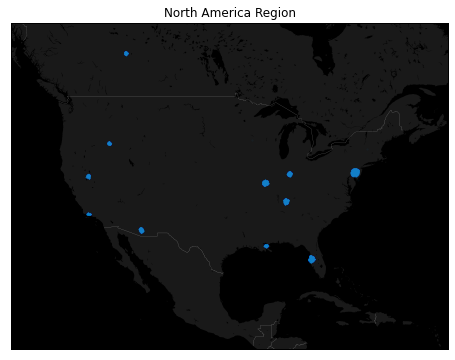

In [9]:
# Sample it down to only the North America region 
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (df_business["longitude"]>lon_min) &\
            (df_business["longitude"]<lon_max) &\
            (df_business["latitude"]>lat_min) &\
            (df_business["latitude"]<lat_max)
#apply the selector to subset
NA_business=df_business[idx_NA]

#initiate the figure
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("North America Region")

This code creates a map of North America with a scatterplot showing the location of a set of businesses in that region. 

First, the boundaries of the map are established in terms of longitude and latitude. Then, a boolean mask called idx_NA is created that selects only those businesses whose geographic coordinates fall within those boundaries. The mask is applied to the df_business dataframe to create a new dataframe called NA_business that contains only businesses in North America.

A figure is then created and a map of North America is assigned to the variable m2 using the Mercator projection and given longitude and latitude boundary parameters.

The continents are added to the map by filling the interior spaces with a given colour and the oceans are added by drawing a border around the map with another colour. Country boundaries are also drawn on the map.

Finally, a scatter plot is added to the map with the businesses using the geographical coordinates of each business. First the coordinates are converted to a projection suitable for the map using the m2() method, and then the scatter method of the Basemap class is used to draw the scatter plot. 



We look at which are the cities with the most reviews for different businesses 

Text(0.5, 0, 'City')

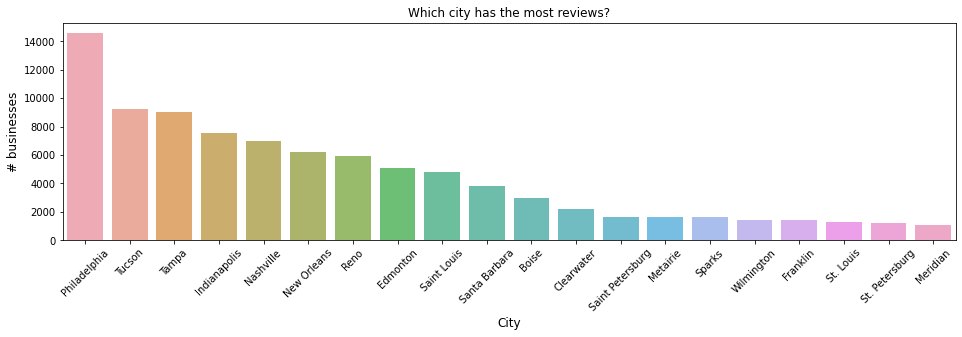

In [10]:
x=df_business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

In [11]:
#get all ratings data
rating_data=df_business[['latitude','longitude','stars','review_count']]
# Creating a custom column popularity using stars*no_of_reviews
rating_data['popularity']=rating_data['stars']*rating_data['review_count']

C:\Users\marti\AppData\Local\Temp\ipykernel_17668\4064825582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['popularity']=rating_data['stars']*rating_data['review_count']


We see the approximate longitude and latitude of the two cities with the most reviews.

In [15]:
display(df_business[(df_business.city == 'Tucson')][['latitude', 'longitude']].head())
display(df_business[(df_business.city == 'Philadelphia')][['latitude', 'longitude']].head())

,latitude,longitude
2,32.223236,-110.880452
16,32.229872,-110.972342
45,32.132305,-110.999985
56,32.186794,-110.954765
67,32.250324,-110.903655


,latitude,longitude
3,39.955505,-75.155564
15,39.953949,-75.143226
19,39.943223,-75.162568
28,39.939825,-75.157447
31,40.022466,-75.218314


C:\Users\marti\AppData\Local\Temp\ipykernel_17668\1616593193.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


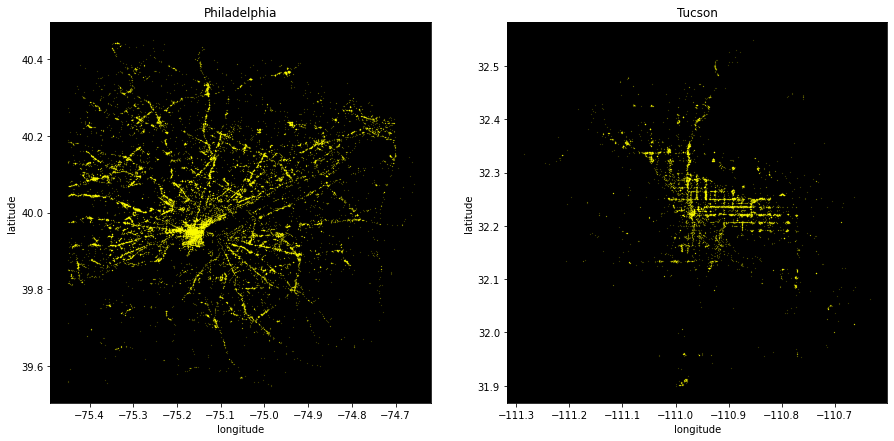

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

#a random point inside Philadelphia
lat = 39.95
lon = -75.15
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas
ratings_data_vegas=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)

ax1.set_title("Philadelphia")
ax1.set_facecolor('black')

#a random point inside Tucson
lat = 32.2
lon = -111
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for pheonix
ratings_data_pheonix=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_pheonix.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Tucson")
ax2.set_facecolor('black')
f.show()

This code creates two scatter plots showing the location of a set of businesses in two different cities: Philadelphia and Tucson. 

First, a figure with two subgraphs is created and the variables ax1 and ax2 are assigned the corresponding axes. Then, the geographic coordinates of Philadelphia and Tucson are set and used to create two Boolean masks that select only those businesses whose geographic coordinates fall within given boundaries around each city.
Next, two scatter plots are created. Each graph is plotted on one of the sub-graphs using the corresponding axes. 